<a href="https://colab.research.google.com/github/zahidjan01a/Email_Spam_Classification_project/blob/main/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing



In [ ]:
# Hello World

In [3]:
!unzip 24824_33185_bundle_archive.zip

unzip:  cannot find or open 24824_33185_bundle_archive.zip, 24824_33185_bundle_archive.zip.zip or 24824_33185_bundle_archive.zip.ZIP.


In [4]:
house_df_main = pd.read_csv('housing.csv')
house_df = house_df_main.copy()



In [5]:
house_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
house_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
house_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [9]:
house_df.fillna(house_df.mean(), inplace=True)

TypeError: Could not convert ['NEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYINLANDNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYINLANDINLANDNEAR BAYNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYINLANDNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANISLANDISLANDISLANDISLANDISLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR BAYNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR BAYNEAR BAY<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYINLANDNEAR BAYNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR BAYNEAR BAYNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR BAYNEAR BAYNEAR OCEANNEAR BAYNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR BAYNEAR OCEANNEAR BAYNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYINLANDNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND'] to numeric

In [10]:
house_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


<Axes: >

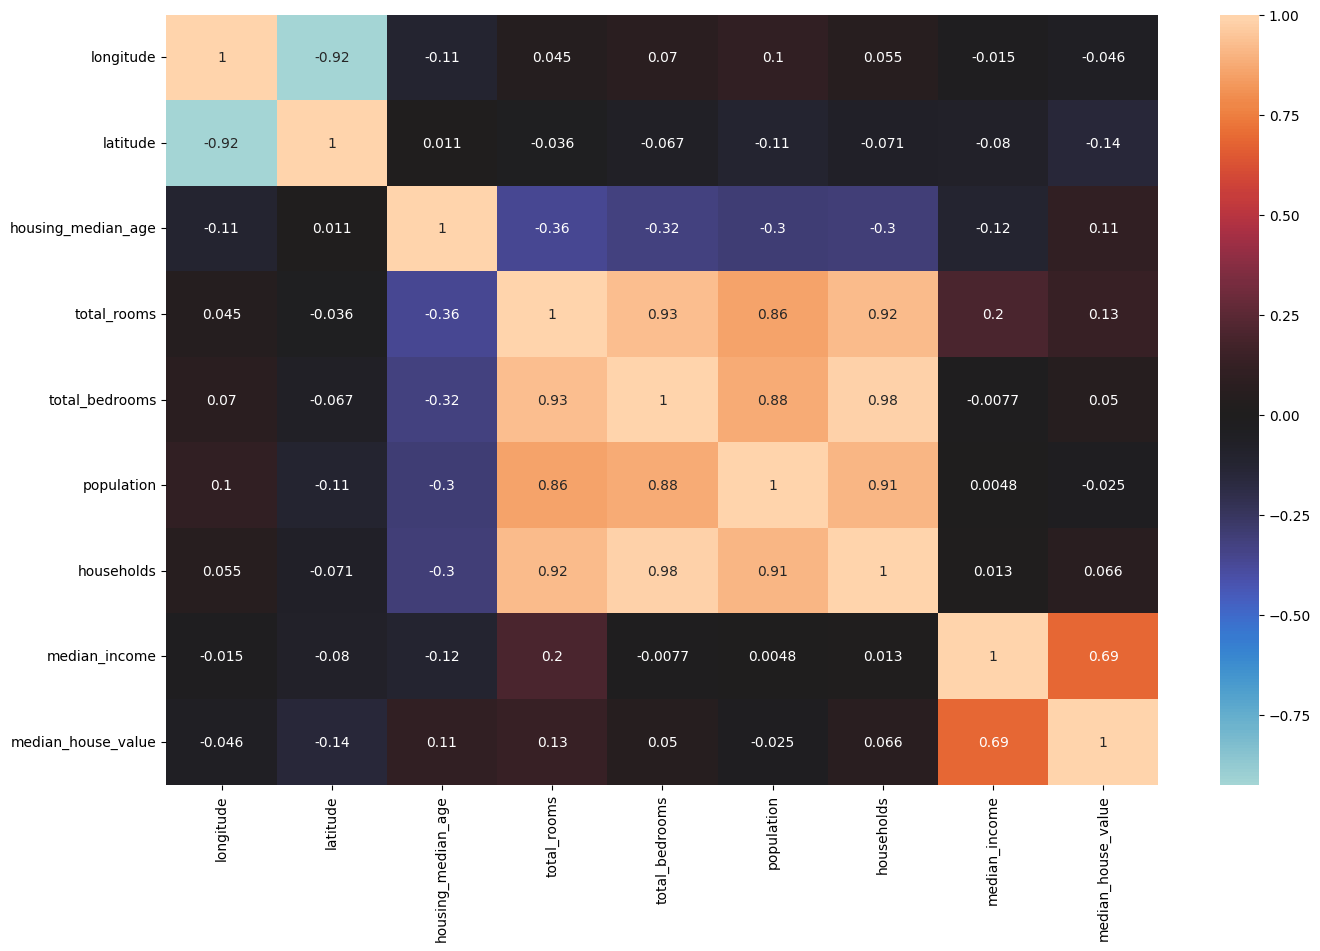

In [15]:
#initial Correlation
plt.figure(figsize = (16,10))
sns.heatmap(house_df.drop('ocean_proximity', axis=1).corr(),annot=True,center=0 )

In [16]:
dic = {}

##Worst Model

In [17]:
wmhouse_df = house_df.copy()
wmhouse_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [18]:
scaler = MinMaxScaler()
column_names_to_normalize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
x = wmhouse_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = wmhouse_df.index)
wmhouse_df[column_names_to_normalize] = df_temp

In [22]:
#worst model
wm_data = wmhouse_df.copy()

# Impute missing values in 'total_bedrooms' with the mean
wm_data['total_bedrooms'].fillna(wm_data['total_bedrooms'].mean(), inplace=True)

wmY = wm_data['median_house_value']
wm_data.drop(columns=['ocean_proximity','median_house_value'],inplace=True)
wmX_train, wmX_test, wmy_train, wmy_test = train_test_split(wm_data, wmY, test_size=0.2, random_state=1)
wm_data.columns

/tmp/ipython-input-2951233086.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wm_data['total_bedrooms'].fillna(wm_data['total_bedrooms'].mean(), inplace=True)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [24]:
model = linear_model.LinearRegression()
model.fit(wmX_train, wmy_train)

LinearRegression()

In [25]:
wmy_pred = model.predict(wmX_test)

In [26]:
MSE = metrics.mean_squared_error(wmy_test, wmy_pred)
RMSE = np.sqrt(metrics.mean_squared_error(wmy_test, wmy_pred))
scores = model.score(wmX_train, wmy_train)
dic['BaseModel'] = (RMSE,scores*100)
print(MSE,RMSE,scores*100)

0.020754608209353802 0.14406459734908436 63.733998383336754


##Exploring data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

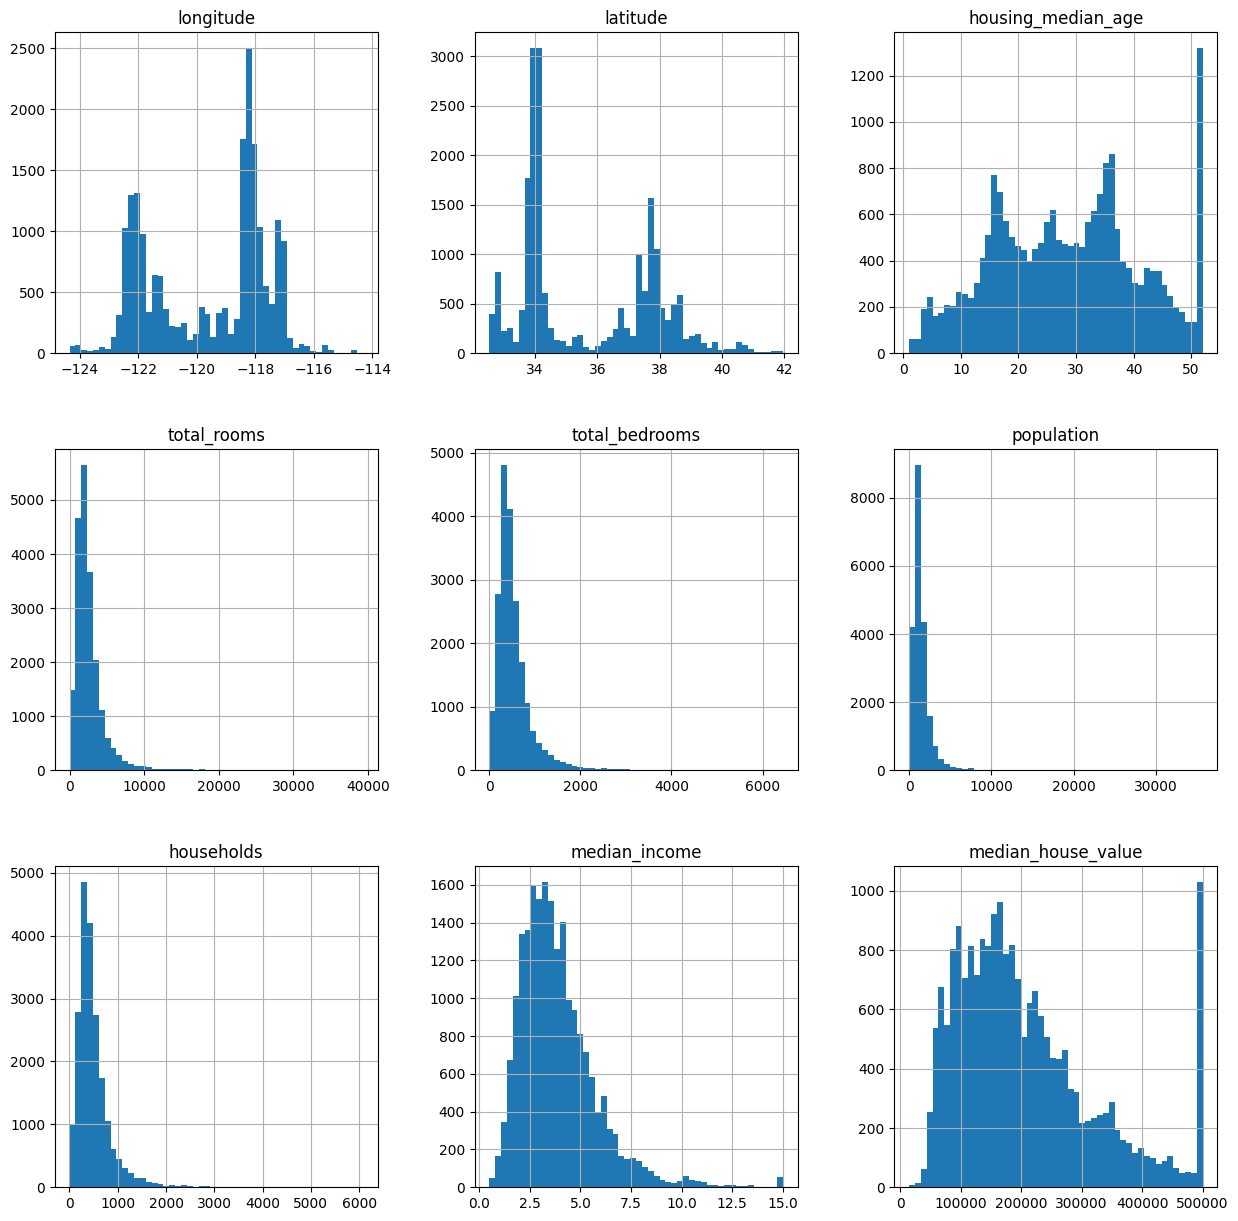

In [27]:
house_df.hist(bins=50, figsize=(15, 15))

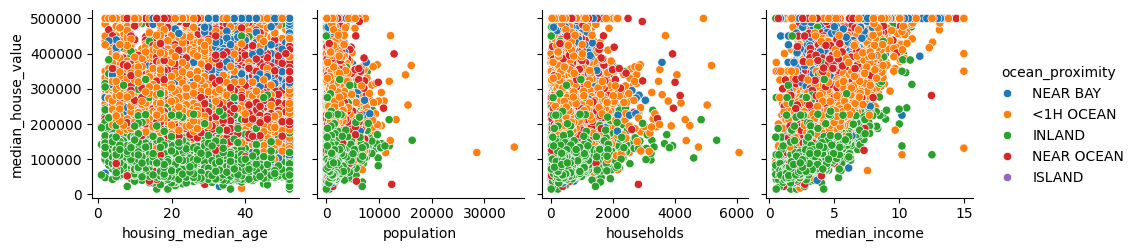

In [28]:
sns.pairplot(house_df, x_vars=['housing_median_age', 'population', 'households', 'median_income'],y_vars ='median_house_value',hue = 'ocean_proximity')

In [29]:
house_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [30]:
house_df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


<Axes: xlabel='ocean_proximity'>

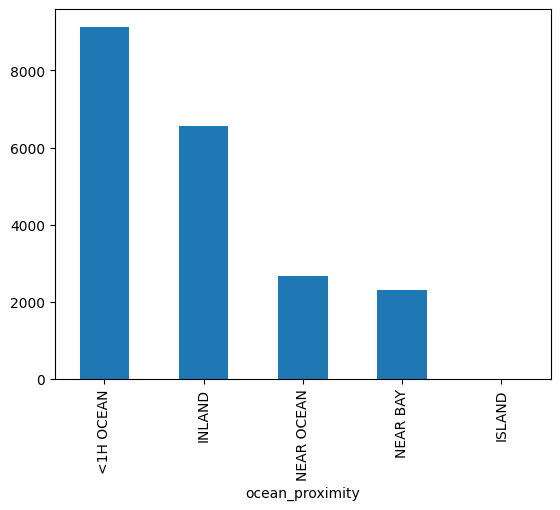

In [31]:
house_df['ocean_proximity'].value_counts().plot(kind='bar')

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

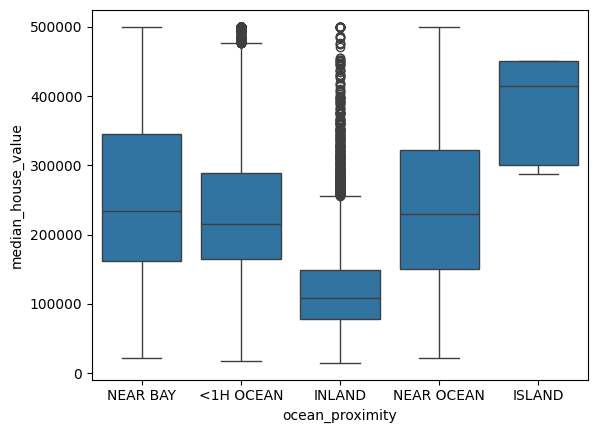

In [32]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=house_df)

<Axes: xlabel='ocean_proximity', ylabel='median_income'>

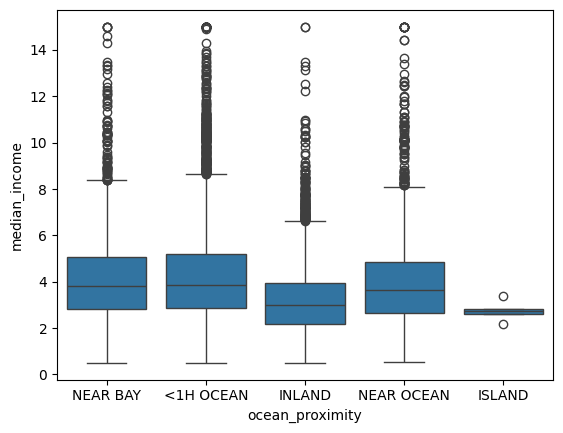

In [33]:
sns.boxplot(x="ocean_proximity", y="median_income", data=house_df)

/tmp/ipython-input-3597102846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['total_bedrooms'],color='red')
/tmp/ipython-input-3597102846.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['total_rooms'],color='blue')


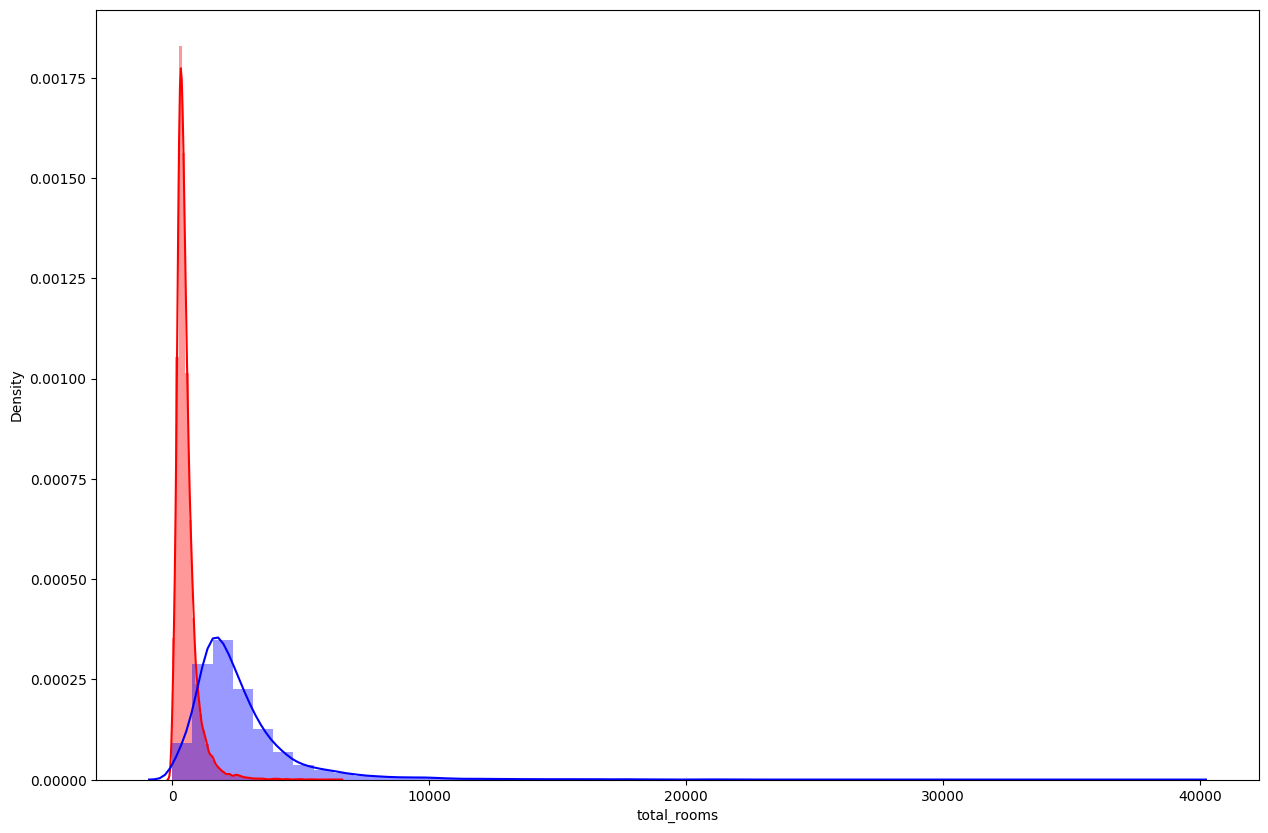

In [34]:
plt.figure(figsize=(15,10))
sns.distplot(house_df['total_bedrooms'],color='red')
sns.distplot(house_df['total_rooms'],color='blue')
plt.show()

/tmp/ipython-input-203954483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((house_df['total_rooms']/house_df['total_bedrooms']),color='green')


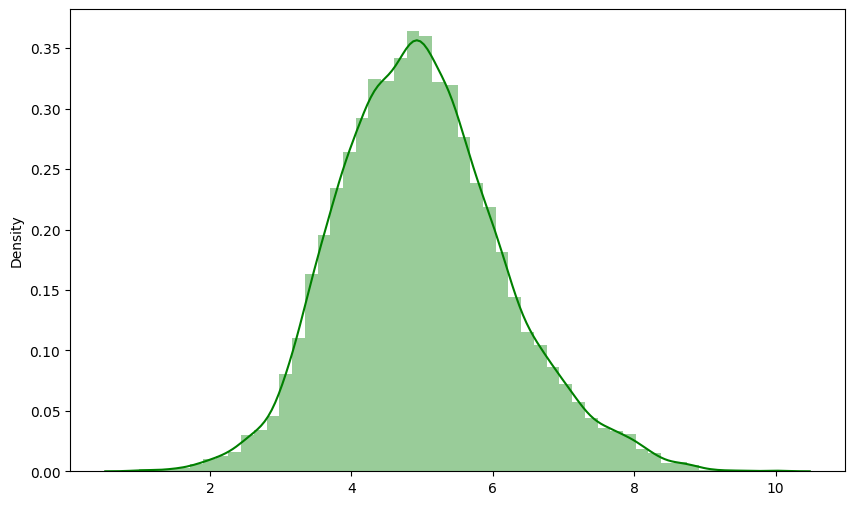

In [35]:
plt.figure(figsize=(10,6))
sns.distplot((house_df['total_rooms']/house_df['total_bedrooms']),color='green')
plt.show()

In [36]:
house_df['room_bed'] = (house_df['total_rooms']/house_df['total_bedrooms'])

In [37]:
house_df['room_bed']

,room_bed
0,6.821705
1,6.418626
2,7.721053
3,5.421277
4,5.810714
...,...
20635,4.451872
20636,4.646667
20637,4.647423
20638,4.547677


In [38]:
house_df1 = house_df.copy()
house_df1 = house_df1.loc[ house_df1['room_bed']<10.0]

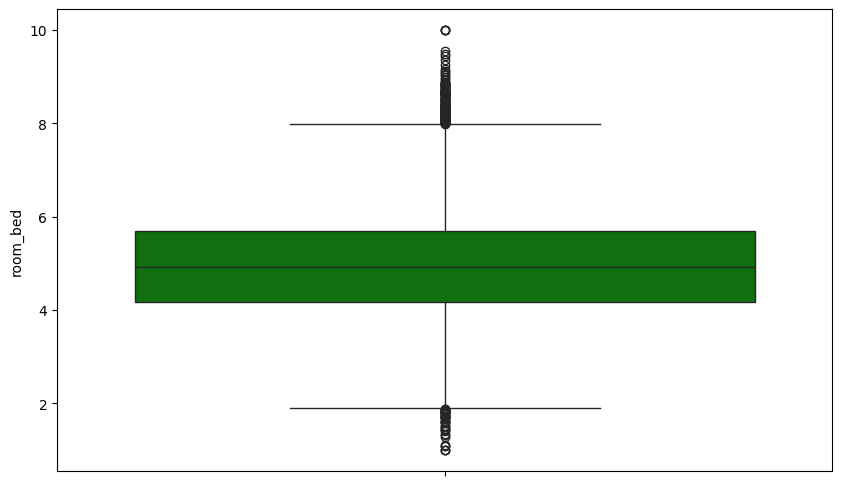

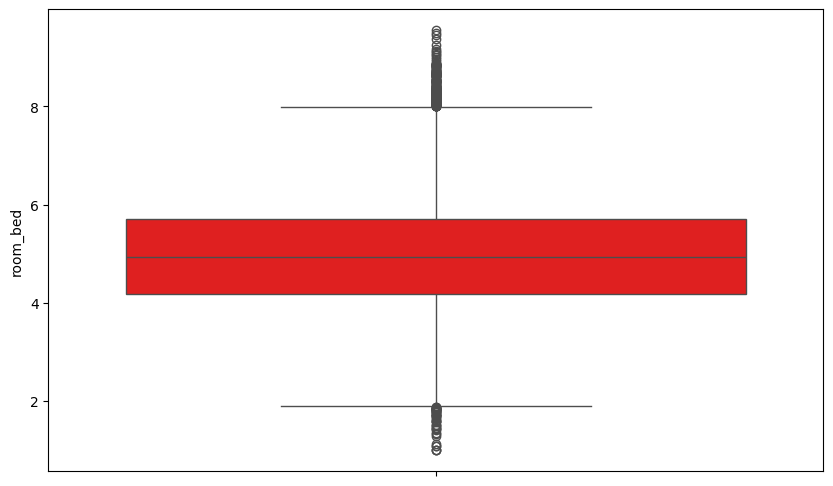

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(house_df['room_bed'],color='green',)

plt.figure(figsize=(10,6))
sns.boxplot(house_df1['room_bed'],color='red')

plt.show()

In [40]:
house_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20429 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20429 non-null  float64
 1   latitude            20429 non-null  float64
 2   housing_median_age  20429 non-null  float64
 3   total_rooms         20429 non-null  float64
 4   total_bedrooms      20429 non-null  float64
 5   population          20429 non-null  float64
 6   households          20429 non-null  float64
 7   median_income       20429 non-null  float64
 8   median_house_value  20429 non-null  float64
 9   ocean_proximity     20429 non-null  object 
 10  room_bed            20429 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


<Axes: xlabel='housing_median_age', ylabel='population'>

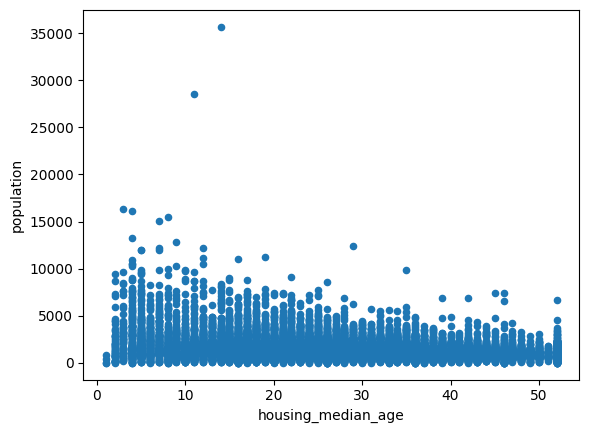

In [41]:

house_df1.plot.scatter(x='housing_median_age', y='population')


In [42]:
house_df1 = house_df1.loc[ house_df['population']<20000]

In [43]:
house_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20427 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20427 non-null  float64
 1   latitude            20427 non-null  float64
 2   housing_median_age  20427 non-null  float64
 3   total_rooms         20427 non-null  float64
 4   total_bedrooms      20427 non-null  float64
 5   population          20427 non-null  float64
 6   households          20427 non-null  float64
 7   median_income       20427 non-null  float64
 8   median_house_value  20427 non-null  float64
 9   ocean_proximity     20427 non-null  object 
 10  room_bed            20427 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


<Axes: xlabel='housing_median_age', ylabel='population'>

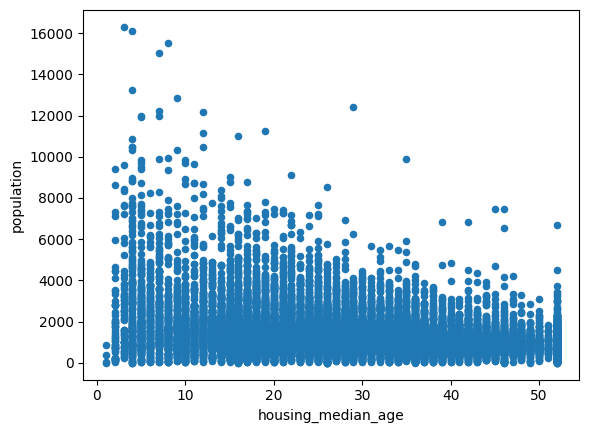

In [44]:
house_df1.plot.scatter(x='housing_median_age', y='population')

In [45]:
house_df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'room_bed'],
      dtype='object')

In [46]:
house_df1['house_pop'] = house_df1['households'] / house_df1['population']

/tmp/ipython-input-1604462430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df1['house_pop'] = house_df1['households'] / house_df1['population']


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'room_bed'}>,
        <Axes: title={'center': 'house_pop'}>, <Axes: >]], dtype=object)

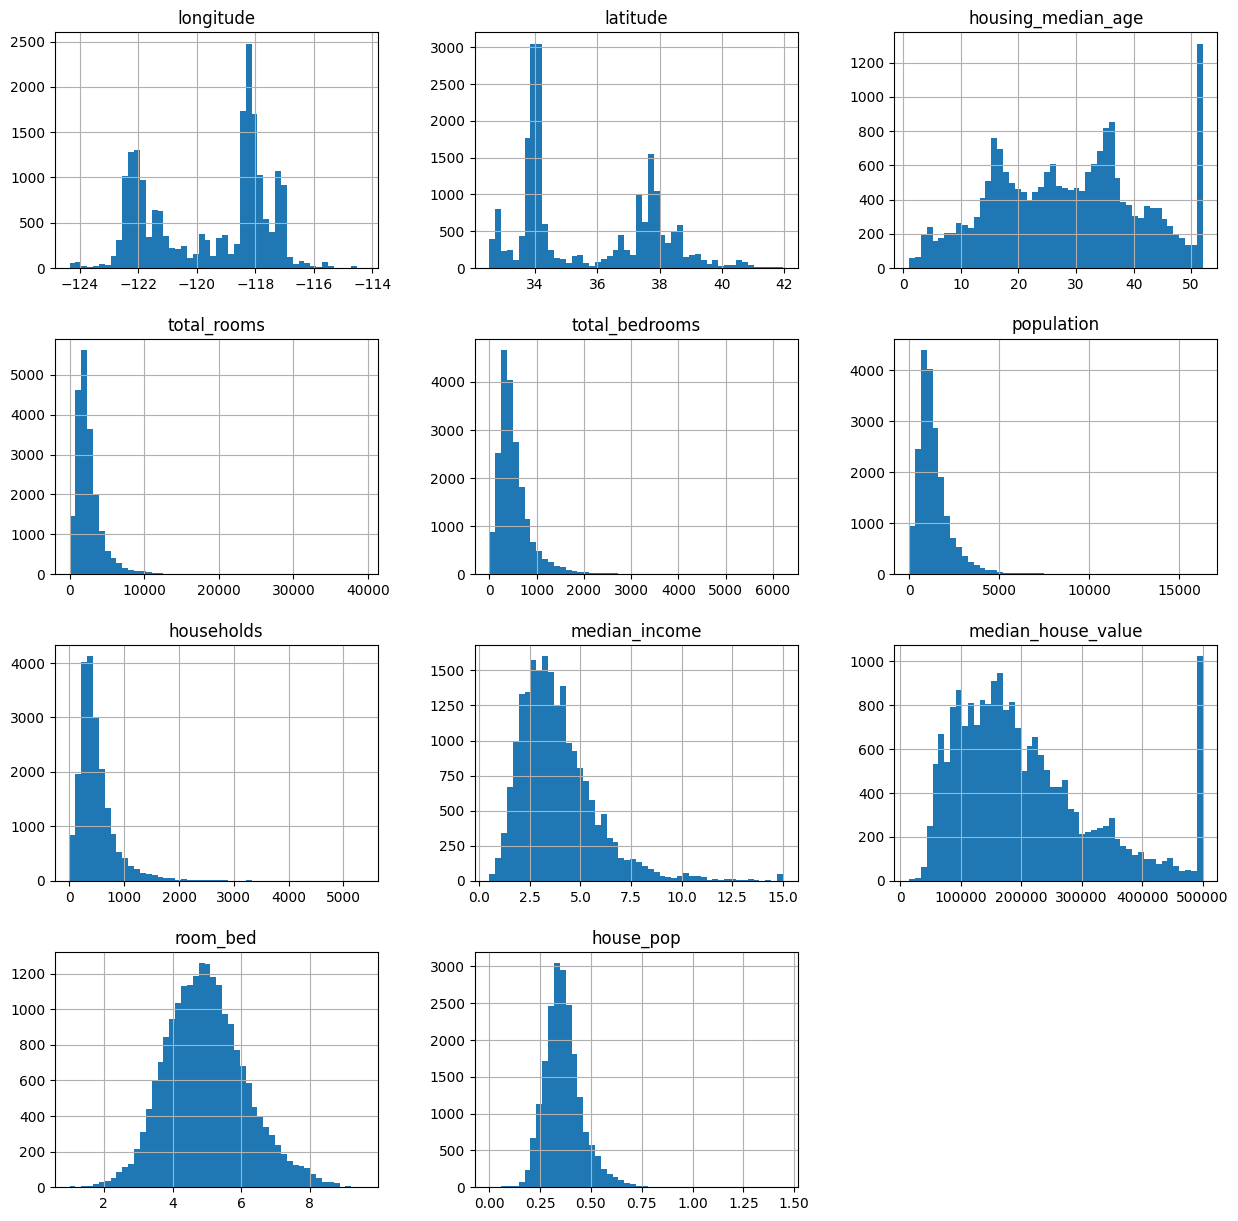

In [47]:
house_df1.hist(bins=50, figsize=(15, 15))

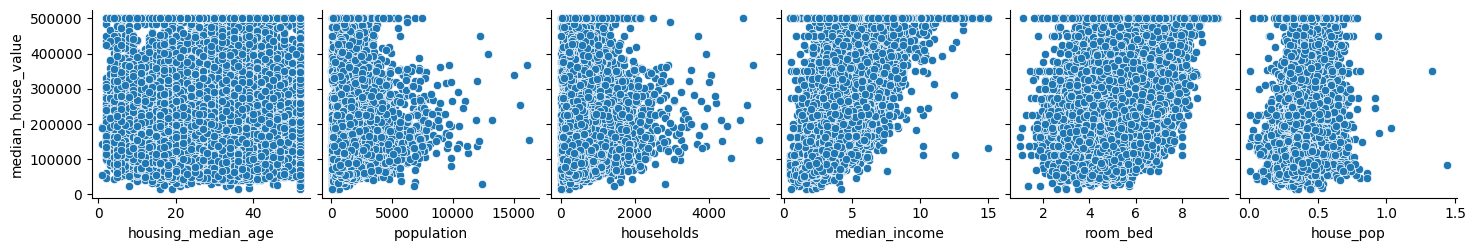

In [48]:
sns.pairplot(house_df1, x_vars=['housing_median_age', 'population', 'households', 'median_income',
       'room_bed','house_pop'],y_vars ='median_house_value')

##Ploting Geographical Map

In [49]:
BBox = (house_df1.longitude.min(),   house_df1.longitude.max(),
         house_df1.latitude.min(), house_df1.latitude.max())

In [50]:
BBox

(-124.35, -114.31, 32.54, 41.95)

NameError: name 'ruh_m' is not defined

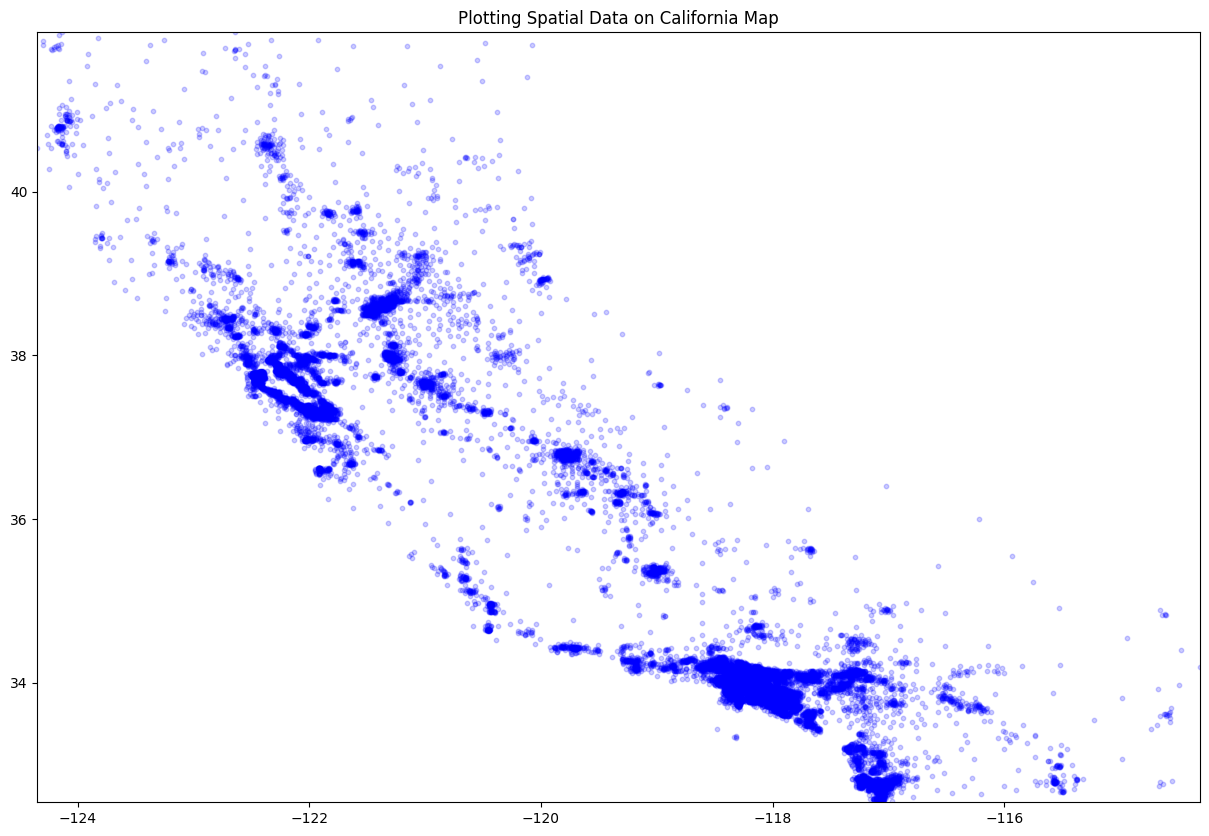

In [52]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(house_df1.longitude, house_df1.latitude, zorder=1, alpha= 0.2, c='blue', s=10)
ax.set_title('Plotting Spatial Data on California Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [53]:
house_df1 = pd.get_dummies(house_df1,columns=['ocean_proximity'])


In [54]:
house_df1.columns
house_df1_norm = house_df1.copy()

In [55]:
scaler = MinMaxScaler()
column_names_to_normalize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'room_bed', 'house_pop']
x = house_df1_norm[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = house_df1_norm.index)
house_df1_norm[column_names_to_normalize] = df_temp

In [56]:
house_df1_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_bed,house_pop,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.020615,0.019568,0.023334,0.539668,0.902266,0.680901,0.270497,False,False,False,True,False
1,0.212151,0.565356,0.392157,0.180503,0.177967,0.147099,0.212246,0.538027,0.708247,0.633757,0.327758,False,False,False,True,False
2,0.210159,0.564293,1.000000,0.037260,0.030440,0.030242,0.032854,0.466028,0.695051,0.786088,0.246634,False,False,False,True,False
3,0.209163,0.564293,1.000000,0.032352,0.037687,0.034045,0.040694,0.354699,0.672783,0.517108,0.271306,False,False,False,True,False
4,0.209163,0.564293,1.000000,0.041330,0.044935,0.034474,0.048161,0.230776,0.674638,0.562657,0.316978,False,False,False,True,False


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'room_bed'}>,
        <Axes: title={'center': 'house_pop'}>, <Axes: >]], dtype=object)

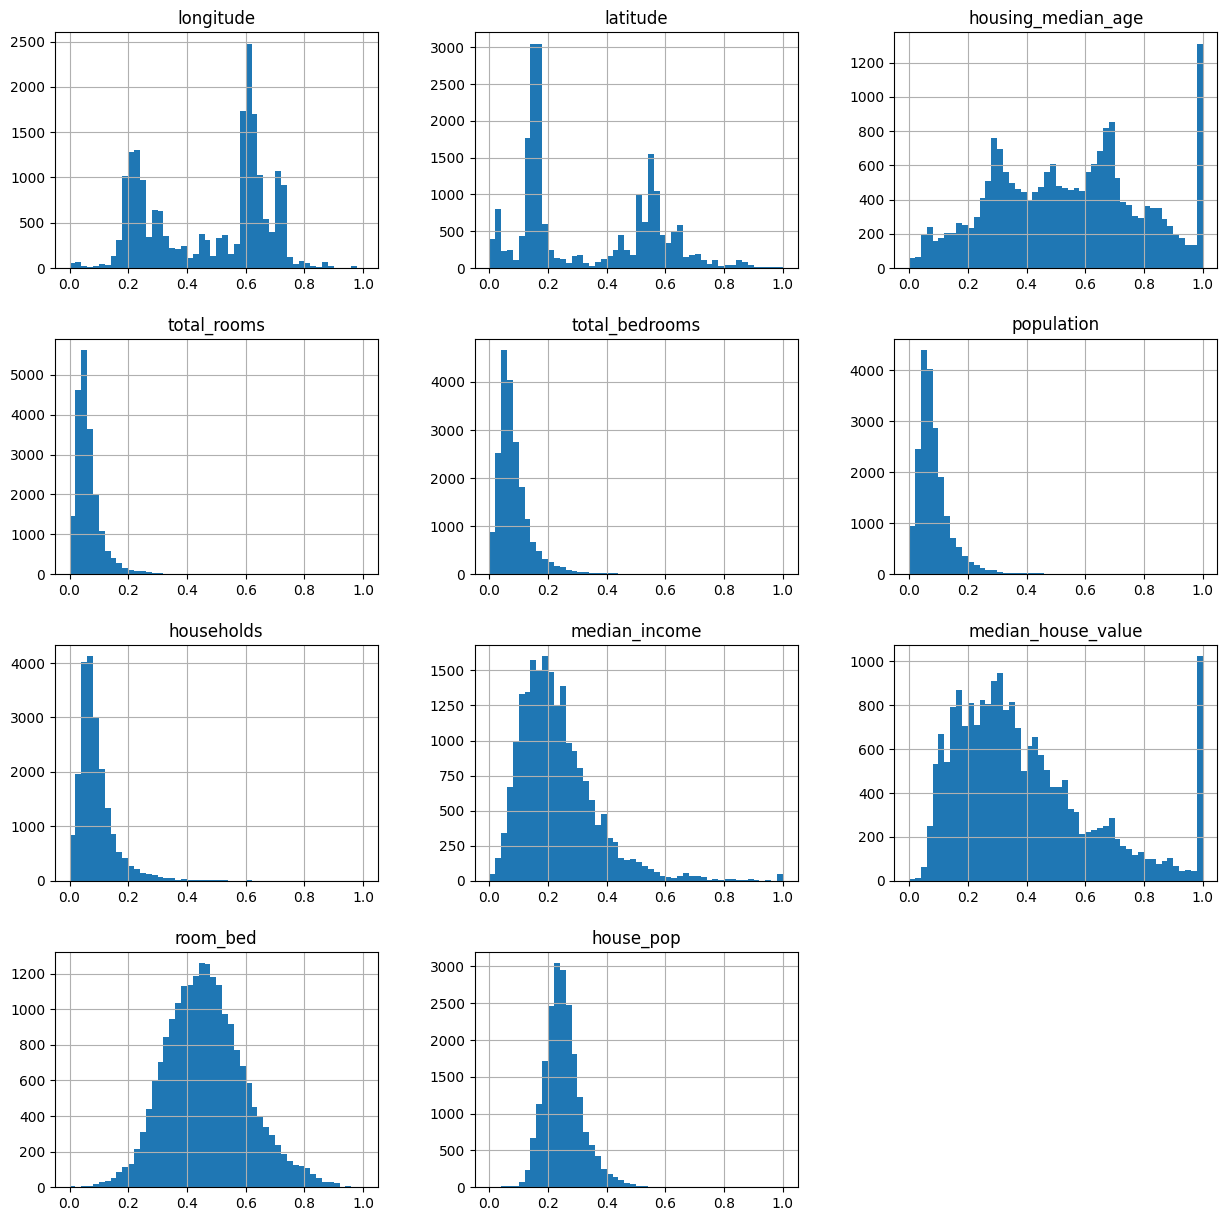

In [57]:
house_df1_norm.hist(bins=50,figsize=(15, 15))

In [58]:
#test model 1
m1_data = house_df1.copy()
m1Y = m1_data['median_house_value']
m2_data = house_df1.copy()
m2_data.drop(columns=['total_rooms',
       'total_bedrooms','population','households','ocean_proximity_ISLAND'],inplace=True)
m1_data.drop(columns=['median_house_value','total_rooms',
       'total_bedrooms','population','households','ocean_proximity_ISLAND'],inplace=True)
m1_data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'room_bed', 'house_pop', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [59]:
m1X_train, m1X_test, m1y_train, m1y_test = train_test_split(m1_data, m1Y, test_size=0.2,random_state=1)

In [60]:
model1 = linear_model.LinearRegression()
model1.fit(m1X_train, m1y_train)

LinearRegression()

In [61]:
m1y_pred = model1.predict(m1X_test)
# m1y_pred_train = model1.predict(m1X_train)

In [62]:
print(metrics.mean_squared_error(m1y_test, m1y_pred))
print(np.sqrt(metrics.mean_squared_error(m1y_test, m1y_pred)))

4209838879.3443875
64883.27118251967


In [63]:
pd.DataFrame(zip(m1_data.columns,model1.coef_))

,0,1
0,longitude,-27121.332502
1,latitude,-26766.322018
2,housing_median_age,870.484251
3,median_income,40794.891043
4,room_bed,-6480.447080
5,house_pop,303830.491369
6,ocean_proximity_<1H OCEAN,-127546.161901
7,ocean_proximity_INLAND,-162846.523848
8,ocean_proximity_NEAR BAY,-134976.640027
9,ocean_proximity_NEAR OCEAN,-129836.963139


In [64]:
pd.DataFrame(zip(m1y_test,m1y_pred),columns=['True','Predicted'])

,True,Predicted
0,359200.0,329874.801579
1,332600.0,319919.545457
2,89400.0,75897.791248
3,97600.0,169765.718558
4,157500.0,230229.223049
...,...,...
4081,177500.0,154647.794351
4082,166700.0,232930.328081
4083,90400.0,121602.267634
4084,52000.0,48762.362184


In [65]:
model1.score(m1X_train, m1y_train)

0.669790550867125

In [66]:
m2_data.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity1', 'ocean_proximity_NEAR BAY': 'ocean_proximity2', 'ocean_proximity_NEAR OCEAN': 'ocean_proximity3'}, inplace=True)

In [67]:
lm2 = smf.ols(formula='median_house_value ~ longitude + latitude + housing_median_age  + median_income + room_bed + house_pop + ocean_proximity1 + ocean_proximity_INLAND + ocean_proximity2 + ocean_proximity3', data=m2_data).fit()

In [68]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     4201.
Date:                Tue, 16 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:03:45   Log-Likelihood:            -2.5567e+05
No. Observations:               20427   AIC:                         5.114e+05
Df Residuals:                   20416   BIC:                         5.115e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2.175e+06   8.93e+04    -24.354      0.000   -2.35e+06      -2e+06
ocean_proximity1[T.True]       -1.413e+05   2.96e+04     -4.782      0.000   -1.99e+05   -8.34e+04
ocean_proximity_INLAND[T.True] -1.765e+05   2.96e+04     -5.960      0.000   -2.35e+05   -1.18e+05
ocean_proximity2[T.True]       -1.493e+05   2.96e+04     -5.047      0.000   -2.07e+05   -9.13e+04
ocean_proximity3[T.True]       -1.436e+05   2.96e+04     -4.858      0.000   -2.02e+05   -8.57e+04
longitude                      -2.692e+04    967.069    -27.839      0.000   -2.88e+04    -2.5e+04
latitude                        -2.65e+04    956.924    -27.693      0.000   -2.84e+04   -2.46e+04
housing_median_age               878.6112     39.565     22.207      0.000     801.060     956.162
median_income                   4.136e+04    439.496     94.112      0.000    4.05e+04    4.22e+04
room_bed                       -7197.6510    694.250    -10.368      0.000   -8558.437   -5836.865
house_pop                       3.067e+05   5217.501     58.787      0.000    2.96e+05    3.17e+05
==============================================================================
Omnibus:                     3654.817   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12923.582
Skew:                           0.884   Prob(JB):                         0.00
Kurtosis:                       6.472   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## By using pipeline

###Decision Tree

In [69]:
model_dt = make_pipeline(preprocessing.StandardScaler(),DecisionTreeRegressor(random_state=0))
scores = cross_val_score(model_dt, m1X_train, m1y_train, cv=10)
model_dt.fit(m1X_train, m1y_train)
pred = model_dt.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['DecisionTree'] = (RMSE,scores.mean() *100)

print(MSE,RMSE)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

4480725054.175966 66938.21818793779
Accuracy: 63.94 (+/- 0.04)


In [70]:
dic

{'BaseModel': (np.float64(0.14406459734908436), 63.733998383336754),
 'DecisionTree': (np.float64(66938.21818793779),
  np.float64(63.939205665435914))}

### Linear Regression

In [71]:
model_lr = make_pipeline(preprocessing.StandardScaler(),linear_model.LinearRegression())
scores = cross_val_score(model_lr, m1X_train, m1y_train, cv=10)

model_lr.fit(m1X_train, m1y_train)
pred = model_lr.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['LinearRegression'] = (RMSE,scores.mean() *100)

print(MSE,RMSE)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

4209838879.3443866 64883.27118251966
Accuracy: 66.87 (+/- 0.03)


#### Ridge Regression

In [72]:
ridge_reg = linear_model.Ridge()
params_Ridge = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(m1X_train, m1y_train)
print(Ridge_GS.best_params_)
model_rr = make_pipeline(preprocessing.StandardScaler(),linear_model.Ridge(random_state=0, **Ridge_GS.best_params_))
scores = cross_val_score(model_rr, m1X_train, m1y_train, cv=10)

model_rr.fit(m1X_train, m1y_train)
pred = model_rr.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))


dic['RidgeRegression'] = (RMSE,scores.mean() *100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

{'alpha': 0.01, 'fit_intercept': True, 'solver': 'svd'}
Accuracy: 66.87 (+/- 0.03)


#### Lasso Regression

In [74]:
lasso_reg = linear_model.Lasso()
params_Lasso = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] , "fit_intercept": [True, False]}
Lasso_GS = GridSearchCV(lasso_reg, param_grid=params_Lasso, n_jobs=-1)
Lasso_GS.fit(m1X_train, m1y_train)
print(Lasso_GS.best_params_)
model_lasso = make_pipeline(preprocessing.StandardScaler(),linear_model.Lasso(random_state=0, **Lasso_GS.best_params_, max_iter=100000))
scores = cross_val_score(model_lasso, m1X_train, m1y_train, cv=10)

model_lasso.fit(m1X_train, m1y_train)
pred = model_lasso.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))


dic['LassoRegression'] = (RMSE,scores.mean() *100)
print(MSE,RMSE)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+13, tolerance: 2.174e+10
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.01, 'fit_intercept': True}
4209843521.2764316 64883.306953918676
Accuracy: 66.87 (+/- 0.03)


### Random Forest

In [75]:
model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=2, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)
model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_2'] = (RMSE,scores.mean() *100)
print("Depth:2 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=5, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)


model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_5'] = (RMSE,scores.mean() *100)

print("Depth:5 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=10, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_10'] = (RMSE,scores.mean() *100)

print("Depth:10 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=20, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_20'] = (RMSE,scores.mean() *100)

print("Depth:20 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))


model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=50, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_50'] = (RMSE,scores.mean() *100)

print("Depth:50 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))


Depth:2 Accuracy: 50.48 (+/- 0.03)
Depth:5 Accuracy: 68.89 (+/- 0.01)
Depth:10 Accuracy: 78.84 (+/- 0.01)
Depth:20 Accuracy: 81.04 (+/- 0.01)
Depth:50 Accuracy: 81.09 (+/- 0.01)


In [76]:
test = model_rf.fit(m1X_train, m1y_train)

In [77]:
pred = test.predict(m1X_test)

In [78]:
print(np.sqrt(metrics.mean_squared_error(m1y_test, pred)))

48102.37767374968


In [79]:
result = pd.DataFrame(zip(m1y_test,pred),columns=['True','Predicted'])

In [80]:
result

,True,Predicted
0,359200.0,349665.09
1,332600.0,336417.02
2,89400.0,89802.00
3,97600.0,124414.00
4,157500.0,156916.00
...,...,...
4081,177500.0,167471.00
4082,166700.0,217055.00
4083,90400.0,95357.00
4084,52000.0,59601.00


In [81]:
accuracy_model = pd.DataFrame(dic,index=['RMSE','Training_Accuracy'])
accuracy_model = accuracy_model.T
accuracy_model

,RMSE,Training_Accuracy
BaseModel,0.144065,63.733998
DecisionTree,66938.218188,63.939206
LinearRegression,64883.271183,66.870784
RidgeRegression,64883.397326,66.870869
LassoRegression,64883.306954,66.870783
RFD_2,81756.957215,50.480587
RFD_5,63877.314647,68.886840
RFD_10,51022.022571,78.843590
RFD_20,48119.131106,81.039349
RFD_50,48102.377674,81.088238


In [82]:
accuracy_model.sort_values(by=['RMSE'],inplace=True)

/tmp/ipython-input-934187287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_model.index,y='RMSE',data=accuracy_model,ax=ax,palette='Greens')


<Axes: xlabel='None', ylabel='RMSE'>

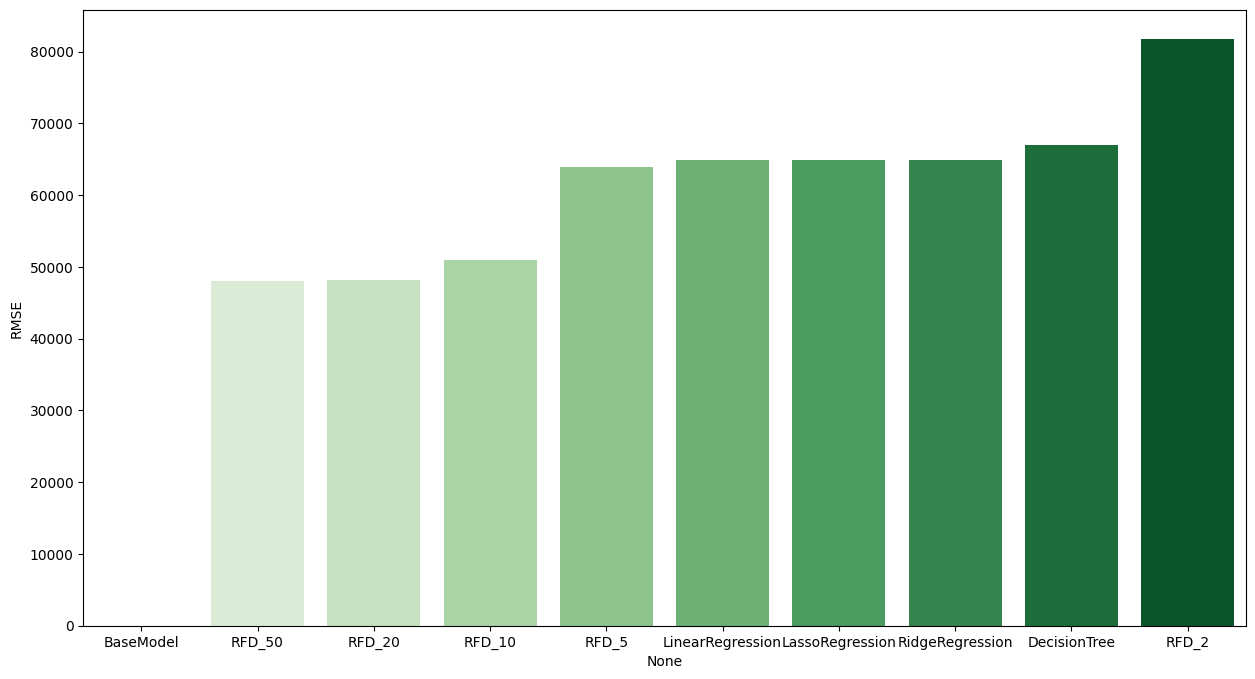

In [83]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='RMSE',data=accuracy_model,ax=ax,palette='Greens')



In [84]:
accuracy_model.sort_values(by=['Training_Accuracy'],inplace=True)

/tmp/ipython-input-277064502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_model.index,y='Training_Accuracy',data=accuracy_model,ax=ax1,palette='Blues')


<Axes: xlabel='None', ylabel='Training_Accuracy'>

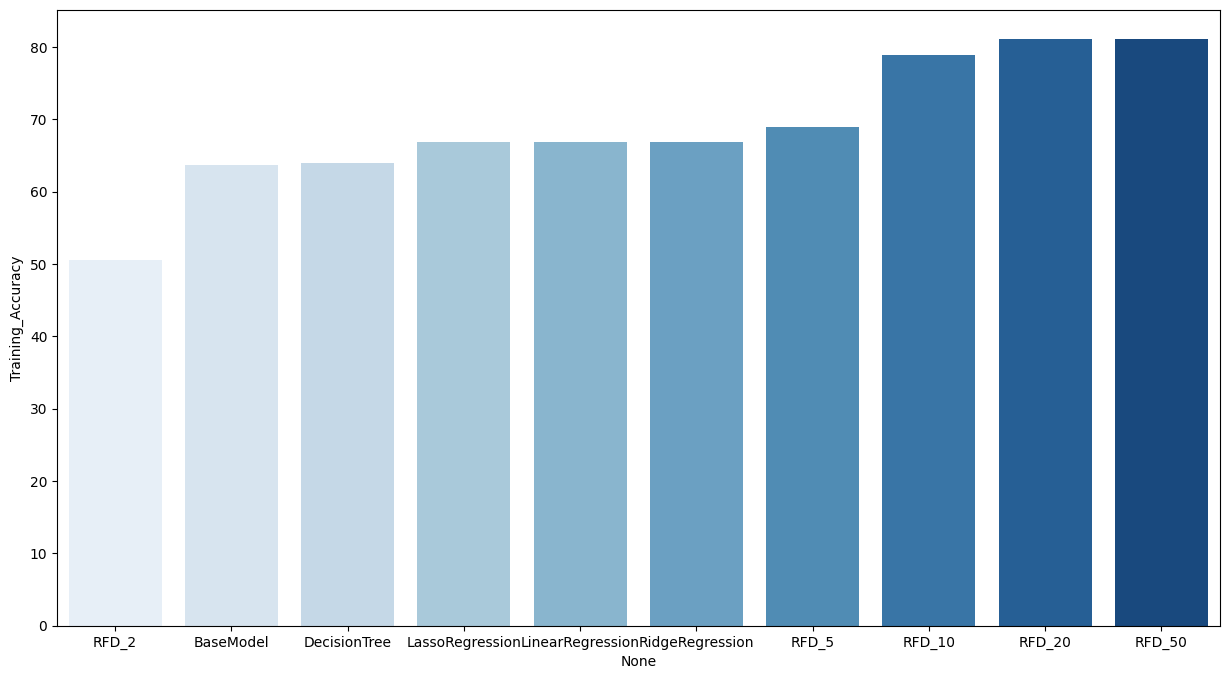

In [85]:
fig1, ax1 = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='Training_Accuracy',data=accuracy_model,ax=ax1,palette='Blues')